# Сервис аренды самокатов GoFast 

<div style="border:solid blue 2px; padding: 20px">

**Цель проекта**: проверить гипотезы и помочь бизнесу вырасти 
    
**Детали использования сервиса аренды самокатов**

Сервисом можно пользоваться:

*без подписки*
- абонентская плата отсутствует;
- стоимость одной минуты поездки 8 рублей;
- стоимость старта (начала поездки) 50 рублей;
  
*с подпиской Ultra*
- абонентская плата 199 руб. в месяц;
- стоимость одной минуты поездки 6 рублей;
- стоимость старта (начала поездки) - бесплатно


</div>

<div style="border:solid orange 2px; padding: 20px">
    
## Описание данных
Данные представлены тремя таблицами с информацией о пользователях, их поездках и подписках за 2021 год для сервиса проката самокатов GoFast

**Пользователи — users_go.csv**
* user_id - уникальный идентификатор пользователя
* name - имя пользователя
* age - возраcт
* city - город
* subscription_type - тип подписки (free, ultra)

**Поездки — rides_go.csv**
* user_id -	уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

**Подписки — subscriptions_go.csv**
* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подпискe
* start_ride_price - стоимость начала поездки
* subscription_fee - ежемесячный платеж на пожписку

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Загрузка данных

In [2]:
# загружаем датасет с информацией о пользователях 
users = pd.read_csv('https://code.s3.yandex.net//datasets/users_go.csv')

In [3]:
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.shape

(1565, 5)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
users.describe(include='all')

,user_id,name,age,city,subscription_type
count,1565.000000,1565,1565.000000,1565,1565
unique,NaN,194,NaN,8,2
top,NaN,Мария,NaN,Пятигорск,free
freq,NaN,23,NaN,226,846
mean,762.633866,NaN,24.922045,NaN,NaN
std,443.260155,NaN,4.553496,NaN,NaN
min,1.000000,NaN,12.000000,NaN,NaN
25%,378.000000,NaN,22.000000,NaN,NaN
50%,762.000000,NaN,25.000000,NaN,NaN
75%,1146.000000,NaN,28.000000,NaN,NaN


In [7]:
# загружаем датасет с информацией о поездках 
rides = pd.read_csv('https://code.s3.yandex.net//datasets/rides_go.csv')

In [8]:
rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
rides.shape

(18068, 4)

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [11]:
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [12]:
# загружает датасет с информацией о подписках
subscription = pd.read_csv('https://code.s3.yandex.net//datasets/subscriptions_go.csv')

In [13]:
subscription.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [14]:
subscription.shape

(2, 4)

In [15]:
subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


***
**Общая информация о данных**
- все три датасета не содержат пропущенных значений
- в датасете rides тип данных переменной date (дата поездки) стоит откорректировать object -> datetype
- все остальные переменные имеют корректный тип данных
*** 

## Предобработка данных

In [16]:
# откоректируем тип данных переменной date в датасате rides 
rides['date'] = pd.to_datetime(rides['date'])

In [17]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [18]:
rides.describe(include='all')

/tmp/ipykernel_48/3463909398.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rides.describe(include='all')


,user_id,distance,duration,date
count,18068.000000,18068.000000,18068.000000,18068
unique,NaN,NaN,NaN,364
top,NaN,NaN,NaN,2021-12-22 00:00:00
freq,NaN,NaN,NaN,72
first,NaN,NaN,NaN,2021-01-01 00:00:00
last,NaN,NaN,NaN,2021-12-30 00:00:00
mean,842.869936,3070.659976,17.805011,NaN
std,434.734317,1116.831209,6.091051,NaN
min,1.000000,0.855683,0.500000,NaN
25%,487.000000,2543.226360,13.597563,NaN


In [19]:
# создадим столбец с номером месяца на основе переменной date 
rides['date_month'] = rides['date'].dt.month

In [20]:
rides.head(5)

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [21]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [22]:
users.duplicated().sum()

31

In [23]:
# на этапе знакомства с данными пропущенных значений выявлено не было. Проведем работы с явными дубликатами 
users = users.drop_duplicates()
users.shape

(1534, 5)

In [24]:
rides.duplicated().sum()

0

In [25]:
subscription.duplicated().sum()

0

In [26]:
# выявление неявных дубликатов. В основном неявные дубликаты могут содержаться в переменных типа object, поэтому проверим переменные с этим типом данных
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [27]:
users['name'].value_counts()

Мария        22
Анна         22
Дмитрий      17
Александр    17
Никита       16
             ..
Илья          3
Семен         2
Радмир        1
Милана        1
Тихон         1
Name: name, Length: 194, dtype: int64

In [28]:
users['name'] = (
    users['name']
    .str.replace('ё', 'е')
) 

In [29]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [30]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [31]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [32]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

***
**Вывод**
- На этапе предобработки данных был добавлен столбец date_month в датаврэйм ridesс информацией о номере месяца поездки
- Были удалены явные дубликаты в таблице users в остальных датафрэймах явных дубликатов обнаружено не было
- Данные были проверены на неявные дубликаты, их не было обнаружено
***

## Исследовательский анализ данных

изучим распределение ключевых переменных проекта 

**Частота встречаемости городов**

/tmp/ipykernel_48/2835888710.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)


[Text(0, 0, 'Тюмень'),
 Text(1, 0, 'Омск'),
 Text(2, 0, 'Москва'),
 Text(3, 0, 'Ростов-на-Дону'),
 Text(4, 0, 'Краснодар'),
 Text(5, 0, 'Пятигорск'),
 Text(6, 0, 'Екатеринбург'),
 Text(7, 0, 'Сочи')]

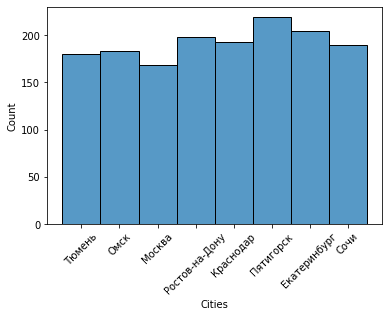

In [33]:
ax = sns.histplot(users['city'])
labels = users['city'].unique()
ax.set_xlabel('Cities', fontsize=10)
ax.set_xticklabels(labels, rotation=45)

In [34]:
cities = pd.DataFrame(users['city'].value_counts()).reset_index()
cities

,index,city
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

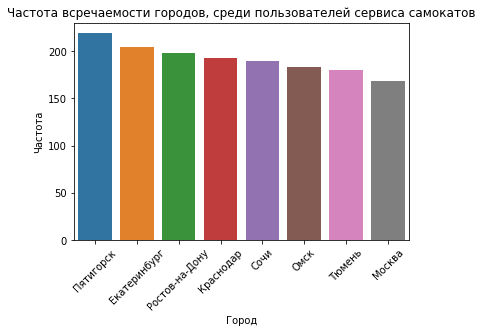

In [35]:
ax = sns.barplot(x = cities['index'], y=cities['city'])
plt.title('Частота всречаемости городов, среди пользователей сервиса самокатов')
plt.xlabel('Город', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)

**Вывод**
- выборка является относительно взвешенной по географической представленности
- наиболее частво встречающийся город - Пятигорск
- наименее часто встречающийся город - Москва 

***
**Соотношение пользователей с подпиской и без подписки**

In [36]:
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [37]:
ax = users.groupby('subscription_type').agg(ratio=('user_id', 'count')).transform(lambda x: 100 * x / x.sum()).reset_index()
ax

,subscription_type,ratio
0,free,54.432855
1,ultra,45.567145


Text(0, 0.5, 'Процент')

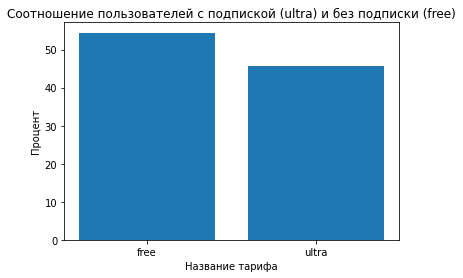

In [38]:
plt.bar(ax['subscription_type'], ax['ratio'])
plt.title('Соотношение пользователей с подпиской (ultra) и без подписки (free)')
plt.xlabel('Название тарифа')
plt.ylabel('Процент')

Text(0.5, 1.0, 'Соотношение пользователей с подпиской (ultra) и без подписки (free)')

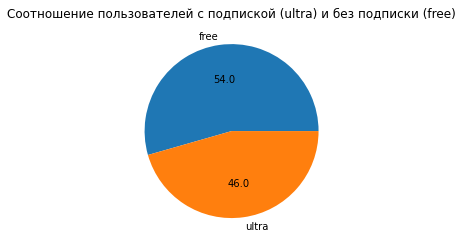

In [39]:
plt.pie(ax['ratio'], labels=ax['subscription_type'], autopct=lambda pct: pct.round(0))
plt.title('Соотношение пользователей с подпиской (ultra) и без подписки (free)')

**Вывод**
- Доля пользователей с подпиской и без подписки примерно одинакова, однако доля пользователей без подписки немного превышает долю пользователей с подпиской 

***
**Возраст пользователей**

Text(0, 0.5, 'Количество пользователей')

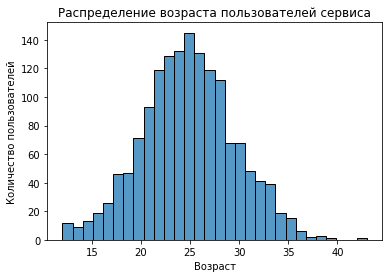

In [40]:
sns.histplot(users['age'])
plt.title('Распределение возраста пользователей сервиса')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

**Вывод**
- Распределение пользователей по возрасту стремится к нормальному
- Больше всего пользователей в возрасте от 20 до 30 лет (молодежь) 

***
**Расстояние, которое пользователь перодолел за одну поездку**

In [41]:
rides.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [42]:
ax = rides.groupby('date_month').agg(avg_distance = ('distance', 'mean')).reset_index()
ax

,date_month,avg_distance
0,1,3089.838538
1,2,3051.065290
2,3,3043.404928
3,4,3044.430588
4,5,3116.592061
5,6,3090.768949
6,7,3094.944074
7,8,3036.645055
8,9,3060.270343
9,10,3035.058792


(0.0, 3800.0)

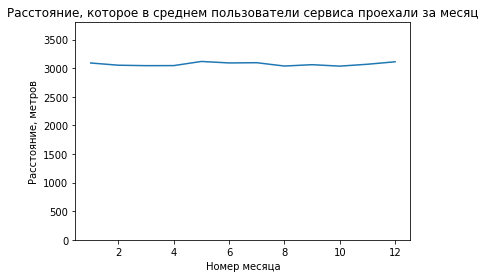

In [43]:
sns.lineplot(x=ax['date_month'],y=ax['avg_distance'])
plt.title('Расстояние, которое в среднем пользователи сервиса проехали за месяц')
plt.xlabel('Номер месяца')
plt.ylabel('Расстояние, метров')
plt.ylim(0,3800)

Text(0, 0.5, 'Расстояние, метров')

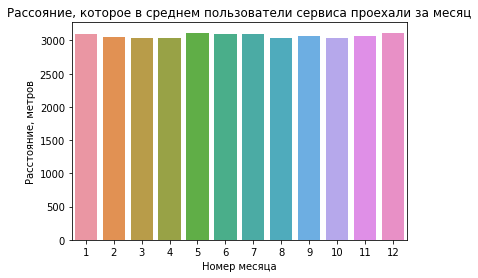

In [44]:
sns.barplot(x=ax['date_month'], y=ax['avg_distance'])
plt.title('Рассояние, которое в среднем пользователи сервиса проехали за месяц')
plt.xlabel('Номер месяца')
plt.ylabel('Расстояние, метров')

Text(0, 0.5, 'Частота')

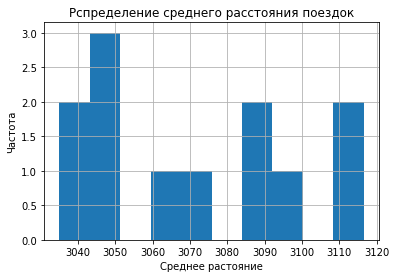

In [45]:
ax['avg_distance'].hist()
plt.xlabel('Среднее растояние')
plt.title('Рспределение среднего расстояния поездок')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

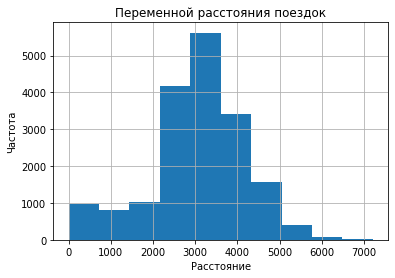

In [46]:
rides['distance'].hist()
plt.xlabel('Расстояние')
plt.title('Переменной расстояния поездок')
plt.ylabel('Частота')

**Вывод**
- средняя дистанция изменяется в зависимости от месяца (может быть связано с фактором сезонности, однако изменение от месяца к месяцу незначительное)
- больше всего расстояния преодолевают в мае и декабре
- меньше всего расстояния преодолевают в августе и октябре  

***
**Продолжительность поездок**

In [47]:
ax = rides.groupby('date_month').agg(avg_duration = ('duration', 'mean')).reset_index()
ax

,date_month,avg_duration
0,1,17.840749
1,2,17.714452
2,3,17.569223
3,4,17.901385
4,5,18.035225
5,6,17.925246
6,7,17.910707
7,8,17.694381
8,9,17.783471
9,10,17.633158


(7.0, 20.0)

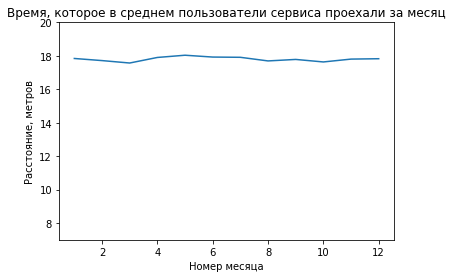

In [48]:
sns.lineplot(x=ax['date_month'], y=ax['avg_duration'])
plt.title('Время, которое в среднем пользователи сервиса проехали за месяц')
plt.xlabel('Номер месяца')
plt.ylabel('Расстояние, метров')
plt.ylim(7,20)

Text(0, 0.5, 'Расстояние, метров')

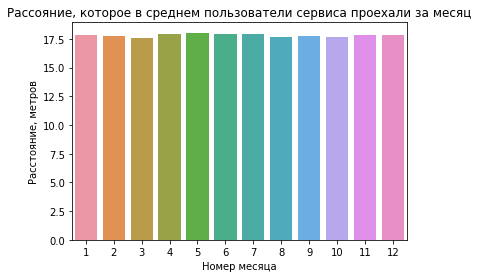

In [49]:
sns.barplot(x=ax['date_month'], y=ax['avg_duration'])
plt.title('Рассояние, которое в среднем пользователи сервиса проехали за месяц')
plt.xlabel('Номер месяца')
plt.ylabel('Расстояние, метров')

Text(0, 0.5, 'Частота')

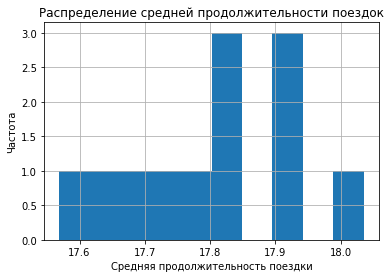

In [50]:
ax['avg_duration'].hist()
plt.title('Распределение средней продолжительности поездок')
plt.xlabel('Средняя продолжительность поездки')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

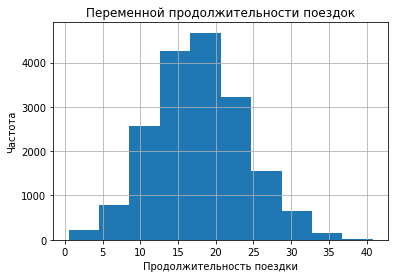

In [51]:
rides['duration'].hist()
plt.title('Переменной продолжительности поездок')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')

**Вывод**
- Средняя продолжительность поездок незначительно варьируется в зависимости от месяца (сезон несущественно влияет на продолжительность поездки)
- Меньше всего по времени пользователи проезжают в марте
- Больше всего по времени пользователи проезжают в мае
- Динамика длительности поездок в зависимости от месяца схожа с динамикой средней дистанции в метрах преодоленной за месяц

## Объединение данных

In [52]:
#Объединим данные о пользователях, поездках и подписках в один датафрейм
total = pd.merge(rides, users, on='user_id', how='left')

In [53]:
total = pd.merge(total, subscription, on='subscription_type', how='left')
total.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [54]:
total.shape

(18068, 12)

In [55]:
rides.shape

(18068, 5)

In [56]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [57]:
#создадим датафрэйм с информацией о пользователях без подписки
total_free = total.loc[total['subscription_type']=='free',]
total_free.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [58]:
#создадим датафрэйм с информацией о пользователях с подпиской
total_subscription = total.loc[total['subscription_type']=='ultra',]
total_subscription.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


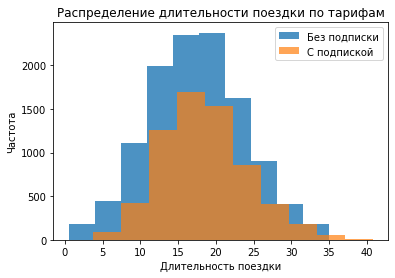

In [59]:
plt.hist(total_free['duration'], label='without subscription', alpha=.8)
plt.hist(total_subscription['duration'], label='subscription', alpha=.7)
plt.title('Распределение длительности поездки по тарифам')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')
plt.legend(labels=['Без подписки', 'С подпиской'])

In [60]:
ax = total.groupby(['subscription_type', 'date_month']).agg(avg_duration=('duration', 'mean'), avg_distance=('distance', 'mean')).reset_index()
ax

,subscription_type,date_month,avg_duration,avg_distance
0,free,1,17.464604,3097.139350
1,free,2,17.145547,3024.264848
2,free,3,17.067239,2994.989557
3,free,4,17.535376,3005.596519
4,free,5,17.641981,3111.052029
5,free,6,17.552159,3075.582838
6,free,7,17.486667,3061.252892
7,free,8,17.153732,2990.105030
8,free,9,17.415103,3049.332494
9,free,10,17.212303,2977.348912


Text(0, 0.5, 'Средняя продолжительность поездки')

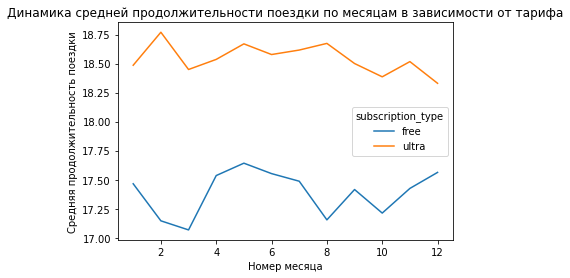

In [61]:
sns.lineplot(x=ax['date_month'], y=ax['avg_duration'], hue=ax['subscription_type'])
plt.title('Динамика средней продолжительности поездки по месяцам в зависимости от тарифа')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя продолжительность поездки')

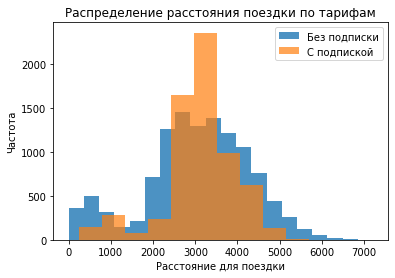

In [62]:
plt.hist(total_free['distance'], label='without subscription', alpha=.8, bins=20)
plt.hist(total_subscription['distance'], label='subscription', alpha=.7)
plt.title('Распределение расстояния поездки по тарифам')
plt.xlabel('Расстояние для поездки')
plt.ylabel('Частота')
plt.legend(labels=['Без подписки', 'С подпиской'])

Text(0, 0.5, 'Средняя расстояние поездки, метров')

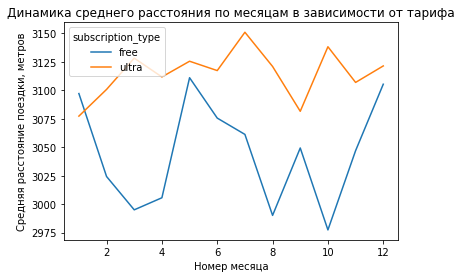

In [63]:
sns.lineplot(x=ax['date_month'], y=ax['avg_distance'], hue=ax['subscription_type'])
plt.title('Динамика среднего расстояния по месяцам в зависимости от тарифа')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя расстояние поездки, метров')

**Вывод**
- распределения продолжительности поездки и преодоленной дистанции схожа для пользователей с подпиской и без
- динамика длительности поездки в зависимости от типа подписки представляет существенные отличия
- динамика преодоленной дистанции в зависимости от типа подписки представляет существенные отличия
- в среднем длительность поездки и расстояние для пользователей без подписки меньше, чем длительность поездки для пользователей с подпиской

## Подсчёт выручки

Создадим аггрегированную таблицу с суммарным расстонием, количеством поездок и суммарное время для каждого пользователя за каждый месяц

In [64]:
total.head(10)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [65]:
total['duration'] = np.ceil(total['duration'])

In [66]:
df_profit = total.groupby(['user_id', 'date_month']).agg(distance_sum = ('distance', 'sum'), ride_count=('date', 'count'), duration_sum=('duration', 'sum'), minute_price_avg=('minute_price','mean'), start_ride_price_avg=('start_ride_price', 'mean'), subscription_fee_avg=('subscription_fee', 'mean'))
df_profit.head(10)

distance_sum  ride_count  duration_sum  minute_price_avg  \
user_id date_month                                                             
1       1            7027.511294           2          42.0                 6   
        4             754.159807           1           7.0                 6   
        8            6723.470560           2          46.0                 6   
        10           5809.911100           2          32.0                 6   
        11           7003.499363           3          56.0                 6   
        12           6751.629942           2          28.0                 6   
2       3           10187.723006           3          63.0                 6   
        4            6164.381824           2          40.0                 6   
        6            3255.338202           1          14.0                 6   
        7            6780.722964           2          48.0                 6   

                    start_ride_price_avg  subscription_fee_avg  
user_id date_month                                              
1       1                              0                   199  
        4                              0                   199  
        8                              0                   199  
        10                             0                   199  
        11                             0                   199  
        12                             0                   199  
2       3                              0                   199  
        4                              0                   199  
        6                              0                   199  
        7                              0                   199

In [67]:
df_profit['profit'] = df_profit['subscription_fee_avg'] + df_profit['start_ride_price_avg']*df_profit['ride_count'] + df_profit['minute_price_avg']*df_profit['duration_sum']
df_profit.head(10)

distance_sum  ride_count  duration_sum  minute_price_avg  \
user_id date_month                                                             
1       1            7027.511294           2          42.0                 6   
        4             754.159807           1           7.0                 6   
        8            6723.470560           2          46.0                 6   
        10           5809.911100           2          32.0                 6   
        11           7003.499363           3          56.0                 6   
        12           6751.629942           2          28.0                 6   
2       3           10187.723006           3          63.0                 6   
        4            6164.381824           2          40.0                 6   
        6            3255.338202           1          14.0                 6   
        7            6780.722964           2          48.0                 6   

                    start_ride_price_avg  subscription_fee_avg  profit  
user_id date_month                                                      
1       1                              0                   199   451.0  
        4                              0                   199   241.0  
        8                              0                   199   475.0  
        10                             0                   199   391.0  
        11                             0                   199   535.0  
        12                             0                   199   367.0  
2       3                              0                   199   577.0  
        4                              0                   199   439.0  
        6                              0                   199   283.0  
        7                              0                   199   487.0

In [68]:
df_profit = df_profit.reset_index()

In [69]:
total_profit_subscription = df_profit.loc[df_profit['subscription_fee_avg']!=0, 'profit']
total_profit_subscription.head(5)

0    451.0
1    241.0
2    475.0
3    391.0
4    535.0
Name: profit, dtype: float64

In [70]:
total_profit_subscription.shape

(4533,)

In [71]:
total_profit_free = df_profit.loc[df_profit['subscription_fee_avg']==0, 'profit']

In [72]:
total_profit_free.shape

(6798,)

## Проверка гипотез

Цель: увеличение количества пользователей с подпиской (с помощью проведения акций)

#### Проверка гипотез о продолжительности поездки

**Н0: продолжительность поездок пользователей с подпиской в среднем равна продолжительности поездок пользователей без подписки**

На: продолжительность поездок пользователей с подпиской в среднем больше продолжительности поездок пользователей без подписки

In [73]:
alpha = 0.05

In [74]:
total_subscription.shape

(6500, 12)

In [75]:
total_free.shape

(11568, 12)

In [76]:
sample_subscription = total_subscription['duration']

In [77]:
sample_free = total_free['duration'].sample(n=6500)

In [78]:
results = st.ttest_ind(sample_subscription, sample_free, alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Продолжительность поездок для пользователей с подпиской в среднем больше, чем для пользователей без подписки.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Продолжительность поездок для пользователей с подпиской и без в среднем равна')

p-value: 4.675274139500313e-30
Отвергаем нулевую гипотезу. Продолжительность поездок для пользователей с подпиской в среднем больше, чем для пользователей без подписки.


Применим второй подход посчитаем среднее для пользователей с подпиской и проверим гипотезу на равенство средней продолжительности поездки пользователей без подписки этому числу 


**Вывод**

Продолжительность поездки в среднем больше для пользователей с подпиской, что делает их более "выгодными" для компании. 
***

#### Проверка гипотез о расстоянии поездок

Расстояние одной поездки в 
313130 метров — оптимальное с точки зрения износа самокат

**H0: среднее расстояние для пользователей с подпиской за одну поездку равно 3130 метров**

Ha: среднее расстояние для пользователей с подпиской за одну поездку больше 3130 метрова. 

In [79]:
opimal_duration = 3130

In [80]:
sample_subscription = total_subscription['distance']

In [81]:
results = st.ttest_1samp(
    sample_subscription, 
    opimal_duration, alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Расстояние пользователей с подпиской в среднем не равно оптимальному состоянию износа самоката.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Расстояние пользователей с подпиской в среднем равно оптимальному состоянию износа самоката')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу. Расстояние пользователей с подпиской в среднем равно оптимальному состоянию износа самоката


**Вывод**

Пользователи с подпиской в среднем проезжают расстояние соответсвующее оптимальному расстоянию с точки зрения износа самоката. Следовательно, пользователи с подпиской не влияют на ускорение износа самокатов, несмотря на более высокую длительность поездок.
***

#### Проверка гипотез о помесячной выручке

**H0: средняя помесячная выручка пользователей с подпиской в среднем равна помесячной выручке пользователей без подписки**

Ha: средняя помесячная выручка пользователей с подпиской в среднем больше помесячной выручки пользователей без подписки

In [82]:
sample_profit_subscription = total_profit_subscription
sample_profit_subscription.shape

(4533,)

In [83]:
sample_profit_free = total_profit_free.sample(n=4533)

In [84]:
results = st.ttest_ind(sample_profit_subscription, sample_profit_free, alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Cредняя помесячная выручка пользователей с подпиской в среднем больше помесячной выручки пользователей без подписки.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Cредняя помесячная выручка пользователей с подпиской в среднем равна помесячной выручке пользователей без подписки.')

p-value: 1.1907801975341288e-29
Отвергаем нулевую гипотезу. Cредняя помесячная выручка пользователей с подпиской в среднем больше помесячной выручки пользователей без подписки.


**Вывод**

Пользователи с подпиской в среднем генерируют компании больше выручки помесячно, чем пользователи без подписки.
***

#### Представьте ситуацию

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


В таком случае выборки будут парными(зависимыми), так как объекты выборки не изменились. Следовательно необходимо будет проверить гипотезу о равенстве средних выборок до обновления серверов и после.

**H0: В среднем количество обращений до и после обновления серверов осталось неизменным**

Ha: В среднем количество обращений после обновления снизилось

Метод из библиотеки scipy.stats:
scipy.stats.ttest_rel(выборка_до_изменения, выборка_после_изменения, alternative='greater')

<div style="border:solid blue 2px; padding: 20px">
    
## Общий Вывод
- Предобработка данных
   * пропусков в данных не было обнаружено
   * На этапе предобработки данных был добавлен столбец date_month в датаврэйм rides информацией о номере месяца поездки
   * Были удалены явные дубликаты в таблице users в остальных датафрэймах явных дубликатов обнаружено не было
   * Данные были проверены на неявные дубликаты, их не было обнаружено

- Исследовательский анализ данных
   * Средняя продолжительность поездок незначительно варьируется в зависимости от месяца (сезон несущественно влияет на продолжительность поездки)
   * Меньше всего по времени пользователи проезжают в марте
   * Больше всего по времени пользователи проезжают в мае
   * Динамика длительности поездок в зависимости от месяца схожа с динамикой средней дистанции в метрах преодоленной за месяц
   
   
   * выборка является относительно взвешенной по географической представленности
   * наиболее частво встречающийся город - Пятигорск
   * наименее часто встречающийся город - Москва 
   
   
   * Распределение пользователей по возрасту стремится к нормальному
   * Больше всего пользователей в возрасте от 20 до 30 лет (молодежь) 
   
   
   * чаще всего пользователи преодолевают дистанцию около 3,1 км
   * продолжительность поездки как правило составляет 17,5 или 18,5 минут

   Subscription VS Free
   * распределения продолжительности поездки и преодоленной дистанции схожа для пользователей с подпиской и без
   * динамика длительности поездки в зависимости от типа подписки представляет существенные отличия
   * динамика преодоленной дистанции в зависимости от типа подписки представляет существенные отличия
   * в среднем длительность поездки и расстояние для пользователей без подписки меньше, чем длительность поездки для пользователей с подпиской

- Проверка гипотез
  * Продолжительность поездки в среднем больше для пользователей с подпиской, что делает их более "выгодными" для компании.
  * Пользователи с подпиской в среднем проезжают расстояние соответсвующее оптимальному расстоянию с точки зрения износа самоката. Следовательно, пользователи с подпиской не влияют на ускорение износа самокатов, несмотря на более высокую длительность поездок.
  * Пользователи с подпиской в среднем генерируют компании больше выручки помесячно, чем пользователи без подписки.
    Таким образом, ориентаци на увеличение пользователей с подпиской действительно должно принести компании экономическую выгоду с точки зрения увеличения прибыли и сокращения риска износа самокатов